<a href="https://colab.research.google.com/github/maqueda-09/trabajos4to/blob/main/Exposicion_CNN/Exposicion_Dani_Max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación de Emociones Humanas**

## Importacion de la Base de Datos

La base de datos que se va a usar para entrenar el modelo la sacamos de www.kaggle.com , el dataset se compone de 5 carpetas con 8000 o más imagenes de fotografías de rostros humanos manifestando las siguientes emociones: Angry - Enojado, Happy - Feliz, Fear - Miedo, Sad - Tristeza, and Surprised - Sorpresa.

Para acceder a la base,primero necesitamos descargar un token de la pag de kaggle, los siguientes comandos abren la aplicación de archivos de la computadora para elegir el archivo kaggle.json que es el token de sguridad.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxvillalpando","key":"c729e45c421e297bf96db0a21ac58314"}'}

Una vez cargado el token, vamos a necesitar crear una carpeta para guardarlo.

In [3]:
!mkdir -p ~/.kaggle #crear el directorio kaggle
!mv kaggle.json ~/.kaggle/ # mover el archivo json
!chmod 600 ~/.kaggle/kaggle.json

Desde Kaggle llamamos a la base de datos de human-face-emotions

In [4]:
# Descargando base de datos
!kaggle datasets download -d samithsachidanandan/human-face-emotions

Dataset URL: https://www.kaggle.com/datasets/samithsachidanandan/human-face-emotions
License(s): apache-2.0
 99% 695M/701M [00:03<00:00, 184MB/s]
100% 701M/701M [00:03<00:00, 220MB/s]


La Base se nos descarga en archivo .zip por lo tanto usaremos las librerias Zipfile y os para poder descomprimir los archivos.

In [5]:
import zipfile
import os

# Descomprimir el archivo zip
zip_path = 'human-face-emotions.zip'
extraction_path = 'emotion_data'

# Crear el directorio de destino
os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print("Base de datos descargada y descomprimida en la carpeta 'emotion_data'.")

Base de datos descargada y descomprimida en la carpeta 'emotion_data'.


Para este punto, hay una carpeta emotion_data/Data que contiene 5 carpetas con las fotos de las 5 diferentes emociones.

## Preparación de los Datos para el Entrenamiento

Para mayor comodidad y por si es necesario ajustarlos, se definen primero los parametros.

In [6]:
# Definir parámetros
image_height = 48  # El tamaño típico para este dataset es 48x48
image_width = 48
batch_size = 100  # Tamaño de batch para el entrenamiento

In [7]:
# Se define la ruta donde se ubica el dataset

data_dir = os.path.join('emotion_data', 'Data')

print(f"Ruta de datos de entrada: {data_dir}")

Ruta de datos de entrada: emotion_data/Data


Ahora cargamos los datos de entrenamiento y validación utilizando tensorflow

In [8]:
import tensorflow as tf

La función '.image_dataset_from_direcctory()' ayuda a crear un objeto del tipo tf.data.Dataset, que es el que normalmente utilizamos para el entrenamiento de la red.

In [9]:
# Conjunto de Entrenamiento
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,# la ruta de la base de datos
  validation_split=0.2, # Usamos el 20% para validación
  subset="training",
  seed=123, # Fijar la semilla para reproducibilidad
  image_size=(image_height, image_width),# los parametros anteriormente definidos
  batch_size=batch_size,
  # Asegurarse de que las imágenes se carguen como escala de grises si son así en el dataset
  # Si las imágenes son RGB, omite el siguiente argumento.
  # color_mode='grayscale'
)

# Conjunto de Validación
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size,
  # color_mode='grayscale'
)


Found 59099 files belonging to 5 classes.
Using 47280 files for training.
Found 59099 files belonging to 5 classes.
Using 11819 files for validation.


In [10]:
print(type(train_ds))
print(type(val_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


Nota: el objeto tensorflow.python.data.ops.prefetch_op._PrefetchDataset es un flujo de datos perezoso (lazy stream) y no una lista de imágenes en memoria, por lo tanto no es posible visulaizar los datos directamente.
Para visualizar las imágenes, debes extraer lotes (batches) de este flujo de datos e iterar sobre ellos.

In [11]:
# Toma un solo lote del dataset
for images, labels in train_ds.take(1):
    # 'images' es un tensor de (batch_size, height, width, channels)
    # 'labels' es un tensor de (batch_size,)
    break # Detiene la iteración después del primer lote

In [12]:
print(images.shape)# tamaño de cada lote, como se definió antes es de bach_size = 32, cada imagen de 48x48 pixels y 3 canales
print(labels.shape)

(100, 48, 48, 3)
(100,)


In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Mostrar las clases cargadas
class_names = train_ds.class_names
print(f"\n✅ Clases detectadas: {class_names}")
print(f"Número de clases: {len(class_names)}")


✅ Clases detectadas: ['Angry', 'Fear', 'Happy', 'Sad', 'Suprise']
Número de clases: 5



Visualizando imágenes. Rango de píxeles: 0.0 - 255.0


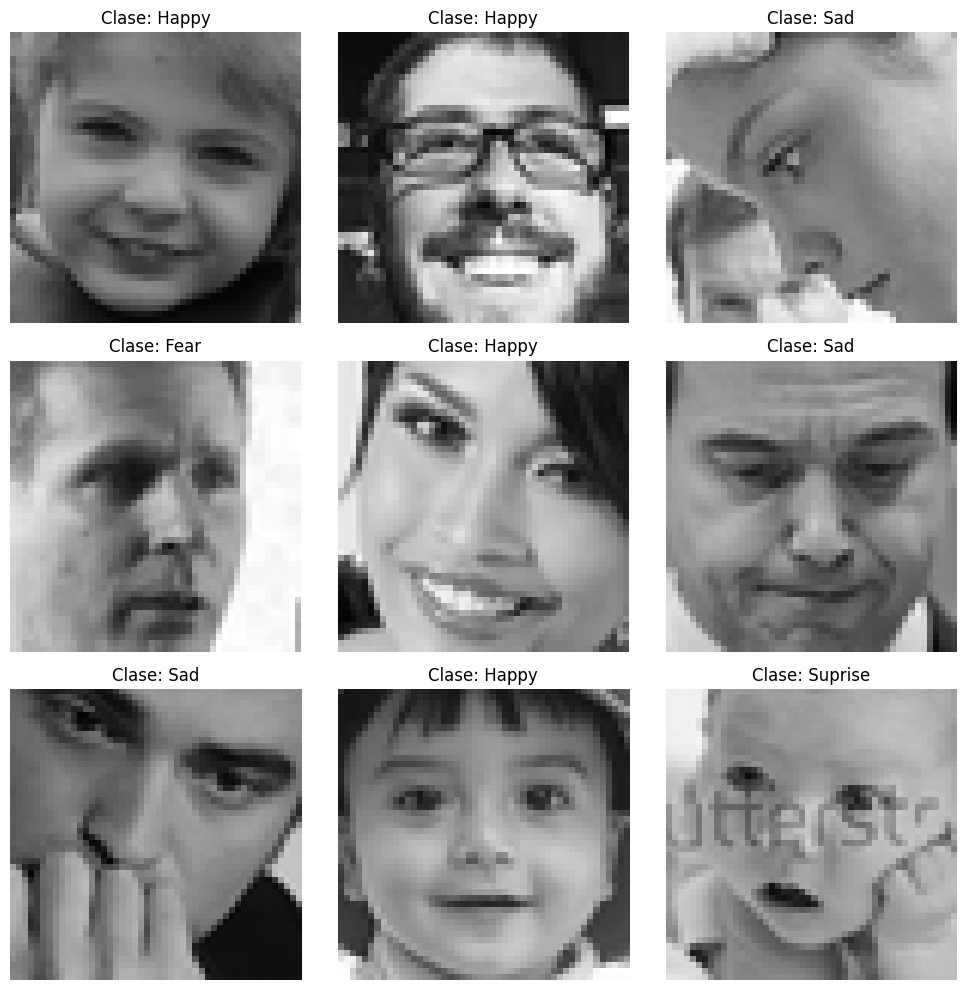

In [15]:
print(f"\nVisualizando imágenes. Rango de píxeles: {images.numpy().min()} - {images.numpy().max()}")

plt.figure(figsize=(10, 10))
num_display = min(9, images.shape[0])

for i in range(num_display):
    ax = plt.subplot(3, 3, i + 1)

    # La imagen está en rango 0-255, imshow la mostrará correctamente
    plt.imshow(images[i].numpy().astype("uint8"))

    # Configuramos el título
    label_text = class_names[labels[i].numpy()]
    plt.title(f"Clase: {label_text}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
images[0]

<tf.Tensor: shape=(48, 48, 3), dtype=float32, numpy=
array([[[119., 119., 119.],
        [125., 125., 125.],
        [157., 157., 157.],
        ...,
        [122., 122., 122.],
        [127., 127., 127.],
        [135., 135., 135.]],

       [[135., 135., 135.],
        [137., 137., 137.],
        [154., 154., 154.],
        ...,
        [125., 125., 125.],
        [132., 132., 132.],
        [136., 136., 136.]],

       [[137., 137., 137.],
        [143., 143., 143.],
        [148., 148., 148.],
        ...,
        [127., 127., 127.],
        [139., 139., 139.],
        [137., 137., 137.]],

       ...,

       [[107., 107., 107.],
        [106., 106., 106.],
        [103., 103., 103.],
        ...,
        [ 24.,  24.,  24.],
        [ 26.,  26.,  26.],
        [ 79.,  79.,  79.]],

       [[ 99.,  99.,  99.],
        [101., 101., 101.],
        [101., 101., 101.],
        ...,
        [ 25.,  25.,  25.],
        [ 40.,  40.,  40.],
        [119., 119., 119.]],

       [[100., 100.

In [17]:
labels[0]#tipo numero entero de 32 bits, valor 2 : Happy

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [18]:
labels[15].numpy()#numero entero de 32 bits, valor 3 : sad

np.int32(2)

In [19]:
# Seleccionar la primera imagen del lote
first_image_tensor = images[0]

# Convertir el tensor a un array de NumPy
first_image_array = first_image_tensor.numpy()

# --- Visualización de los Atributos y el Arreglo ---

print("\n--- Atributos del Arreglo de Píxeles ---")
print(f"Forma (Shape): {first_image_array.shape} (Altura, Anchura, Canales)")
print(f"Tipo de Dato (dtype): {first_image_array.dtype} (Debe ser int/uint)")
print(f"Valor Mínimo de Píxel: {first_image_array.min()}")
print(f"Valor Máximo de Píxel: {first_image_array.max()}")

print("\n--- Muestra del Arreglo de Píxeles (Primeros Píxeles) ---")
# Imprimir solo una pequeña porción para no llenar la consola,
# por ejemplo, los valores RGB de los píxeles superiores izquierdos (0-5 filas, 0-5 columnas)
print(first_image_array[0:5, 0:5, :])


--- Atributos del Arreglo de Píxeles ---
Forma (Shape): (48, 48, 3) (Altura, Anchura, Canales)
Tipo de Dato (dtype): float32 (Debe ser int/uint)
Valor Mínimo de Píxel: 3.0
Valor Máximo de Píxel: 191.0

--- Muestra del Arreglo de Píxeles (Primeros Píxeles) ---
[[[119. 119. 119.]
  [125. 125. 125.]
  [157. 157. 157.]
  [151. 151. 151.]
  [129. 129. 129.]]

 [[135. 135. 135.]
  [137. 137. 137.]
  [154. 154. 154.]
  [147. 147. 147.]
  [126. 126. 126.]]

 [[137. 137. 137.]
  [143. 143. 143.]
  [148. 148. 148.]
  [140. 140. 140.]
  [126. 126. 126.]]

 [[140. 140. 140.]
  [142. 142. 142.]
  [147. 147. 147.]
  [132. 132. 132.]
  [126. 126. 126.]]

 [[107. 107. 107.]
  [132. 132. 132.]
  [134. 134. 134.]
  [127. 127. 127.]
  [116. 116. 116.]]]


Con la exploración anterior, ya sabemos como es la composición de nuestros datos, lo que facilitará la selección de la red neuronal y el preprocesamiento de los datos.

## Preprocesamiento de los Datos

Para que la red neuronal trabaje optimamente, es mejor escalar los datos, así las operaciones resultarán más simples. Con este fin, ocuparemos una capa de normalización que está incluida en tensorflow.keras.

Dado que cada tensor es un arreglo de datos que van desde 0 hasta 255, es decir, en un intervalo de [0,255], pero una vez aplicada la normalización el intervalo debe ser desde [0,1] por lo que el factor de normalización será (1/255)

Para aplicar la normalización a cada elemento del dataset se usa la función map() y también la función anonima lambda para aplicar la normalización solamente a las imagenes 'x' y no a los labels 'y'

Una vez normalizados, se utiliza tf.data.AUTOTUNE para permitir que TensorFlow ajuste automáticamente el uso de recursos.
Los métodos .cache(), .shuffle(1000) (solo en entrenamiento), y .prefetch() trabajan juntos: .cache() almacena los datos en memoria o disco tras la primera lectura para acelerar las épocas siguientes; .shuffle() mezcla los datos de entrenamiento para prevenir el sobreajuste; y, finalmente, .prefetch() superpone la carga y pre-procesamiento del siguiente lote de datos con el entrenamiento del lote actual, asegurando que la GPU nunca esté inactiva esperando datos.

In [20]:
# Normalización: Escalar los valores de píxeles de [0, 255] a [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Aplicar normalización a los datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Optimizar el rendimiento
AUTOTUNE = tf.data.AUTOTUNE

# .cache(): mantiene las imágenes en memoria (útil si caben)
# .shuffle(1000): mezcla los datos de entrenamiento
# .prefetch(buffer_size): superpone el preprocesamiento de datos y la ejecución del modelo
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Datos listos para construir la CNN!")

Datos listos para construir la CNN!


## Construcción de la Red Neuronal

### Primer Configuración

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Definir los hiperparámetros de entrada
num_classes = len(class_names) # Número de categorías de emoción (ej. 5)
input_shape = (image_height, image_width, 3) # (48, 48, 3) si es RGB

# 2. Construir el modelo secuencial
model = Sequential([
    # Bloque 1: Convolución y Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    # Bloque 2: Más convolución para aprender características más complejas
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Capa de Aplanamiento (Flatten)
    Flatten(), # Convierte el tensor 3D a un vector 1D

    # Capas Densas (Fully Connected)
    Dense(128, activation='relu'),
    #Dropout(0.5), # Más Dropout antes de la salida

    # Capa de Salida
    # Usamos 'softmax' para problemas de clasificación multiclase.
    Dense(num_classes, activation='softmax')
])

# 3. Compilar el modelo
model.compile(
    optimizer='adam', # Optimizador muy común y eficiente
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 4. Mostrar el resumen del modelo
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,365 (3.20 MB)

 Trainable params: 839,365 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Definir el número de épocas (ciclos completos sobre el dataset)
epochs = 15

print(f"\nIniciando entrenamiento por {epochs} épocas...")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Entrenamiento finalizado.")


Iniciando entrenamiento por 15 épocas...
Epoch 1/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.3837 - loss: 1.4465 - val_accuracy: 0.5352 - val_loss: 1.1512
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5589 - loss: 1.0986 - val_accuracy: 0.5838 - val_loss: 1.0308
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6259 - loss: 0.9555 - val_accuracy: 0.6276 - val_loss: 0.9511
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6848 - loss: 0.8206 - val_accuracy: 0.6519 - val_loss: 0.9012
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7469 - loss: 0.6791 - val_accuracy: 0.6942 - val_loss: 0.8171
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8070 - loss: 0.5394 - val_accuracy: 0.7303 - val_loss: 0.7595
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8535 - loss: 0.4192 - val_accuracy: 0.7637 - val_loss: 0.7246
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accura

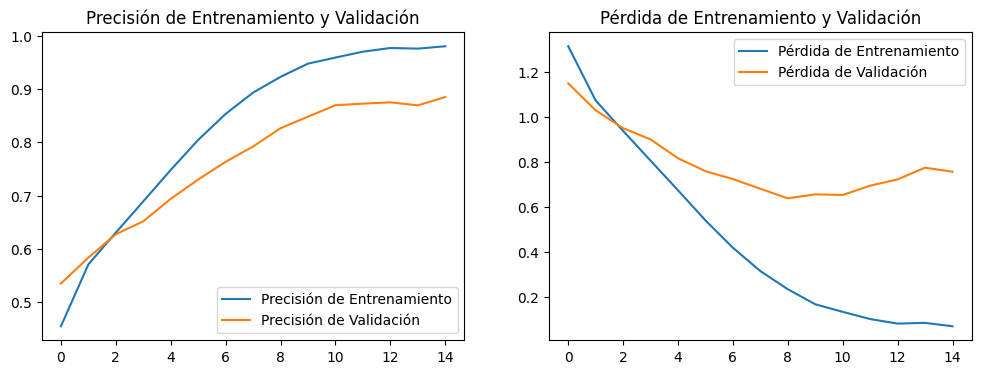

In [23]:
import matplotlib.pyplot as plt

# Obtener la historia de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()

In [24]:
# Evaluar el modelo usando el conjunto de validación
print("Iniciando evaluación final del modelo...")

loss, accuracy = model.evaluate(val_ds, verbose=1)

print(f"\n✅ Pérdida (Loss) en Validación: {loss:.4f}")
print(f"✅ Precisión (Accuracy) en Validación: {accuracy:.4f}")

Iniciando evaluación final del modelo...
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8826 - loss: 0.7445

✅ Pérdida (Loss) en Validación: 0.7571
✅ Precisión (Accuracy) en Validación: 0.8852


### Segunda Configuración

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Definir los hiperparámetros de entrada
num_classes = len(class_names) # Número de categorías de emoción (ej. 5)
input_shape = (image_height, image_width, 3) # (48, 48, 3) si es RGB

# 2. Construir el modelo secuencial
model = Sequential([
    # Bloque 1: Convolución y Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    # Bloque 2: Más convolución para aprender características más complejas
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Bloque 3 (Opcional): Más profundidad y Dropout para regularización
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Ayuda a prevenir el sobreajuste

    # Capa de Aplanamiento (Flatten)
    Flatten(), # Convierte el tensor 3D a un vector 1D

    # Capas Densas (Fully Connected)
    Dense(256, activation='relu'),
    #Dropout(0.5), # Más Dropout antes de la salida

    # Capa de Salida
    # Usamos 'softmax' para problemas de clasificación multiclase.
    Dense(num_classes, activation='softmax')
])


In [26]:
# Compilar el modelo
model.compile(
    optimizer='adam', # Optimizador muy común y eficiente
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 4. Mostrar el resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,077 (2.36 MB)

 Trainable params: 619,077 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Definir el número de épocas (ciclos completos sobre el dataset)
epochs = 15

print(f"\nIniciando entrenamiento por {epochs} épocas...")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Entrenamiento finalizado.")


Iniciando entrenamiento por 15 épocas...
Epoch 1/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3707 - loss: 1.4646 - val_accuracy: 0.5659 - val_loss: 1.1074
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5677 - loss: 1.0797 - val_accuracy: 0.6121 - val_loss: 0.9781
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6223 - loss: 0.9531 - val_accuracy: 0.6546 - val_loss: 0.8927
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6667 - loss: 0.8482 - val_accuracy: 0.6791 - val_loss: 0.8273
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7055 - loss: 0.7541 - val_accuracy: 0.7079 - val_loss: 0.7575
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7485 - loss: 0.6660 - val_accuracy: 0.7412 - val_loss: 0.6952
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7842 - loss: 0.5729 - val_accuracy: 0.7684 - val_loss: 0.6291
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accura

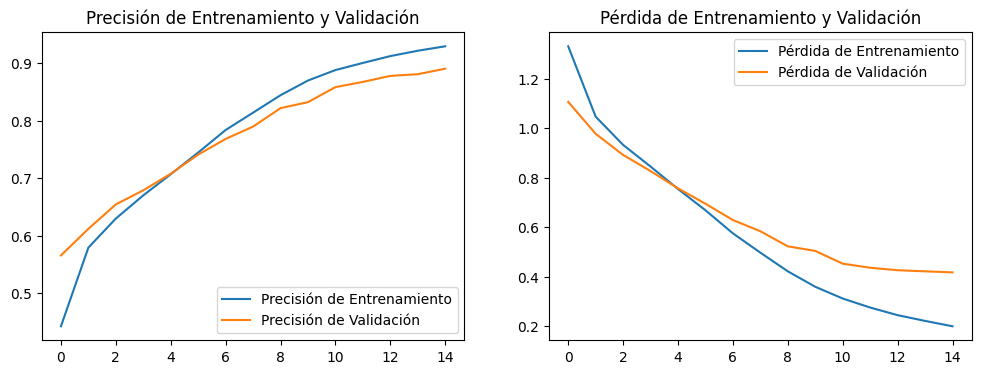

In [28]:
import matplotlib.pyplot as plt

# Obtener la historia de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()

### Tercera Configuración

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Definir los hiperparámetros de entrada
num_classes = len(class_names) # Número de categorías de emoción (ej. 5)
input_shape = (image_height, image_width, 3) # (48, 48, 3) si es RGB

# 2. Construir el modelo secuencial
model = Sequential([
    # Bloque 1: Convolución y Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    # Bloque 2: Más convolución para aprender características más complejas
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Bloque 3 (Opcional): Más profundidad y Dropout para regularización
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Ayuda a prevenir el sobreajuste

    # Capa de Aplanamiento (Flatten)
    Flatten(), # Convierte el tensor 3D a un vector 1D

    # Capas Densas (Fully Connected)
    Dense(256, activation='relu'),
    Dropout(0.5), # Más Dropout antes de la salida

    # Capa de Salida
    # Usamos 'softmax' para problemas de clasificación multiclase.
    Dense(num_classes, activation='softmax')
])

# 3. Compilar el modelo
model.compile(
    optimizer='adam', # Optimizador muy común y eficiente
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 4. Mostrar el resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,077 (2.36 MB)

 Trainable params: 619,077 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Definir el número de épocas (ciclos completos sobre el dataset)
epochs = 15

print(f"\nIniciando entrenamiento por {epochs} épocas...")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Entrenamiento finalizado.")


Iniciando entrenamiento por 15 épocas...
Epoch 1/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3615 - loss: 1.4832 - val_accuracy: 0.5324 - val_loss: 1.1468
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5461 - loss: 1.1263 - val_accuracy: 0.6023 - val_loss: 1.0118
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6008 - loss: 0.9985 - val_accuracy: 0.6315 - val_loss: 0.9268
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6360 - loss: 0.9237 - val_accuracy: 0.6587 - val_loss: 0.8738
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6674 - loss: 0.8510 - val_accuracy: 0.6805 - val_loss: 0.8229
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6932 - loss: 0.7933 - val_accuracy: 0.6913 - val_loss: 0.7909
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7094 - loss: 0.7410 - val_accuracy: 0.7082 - val_loss: 0.7605
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accura

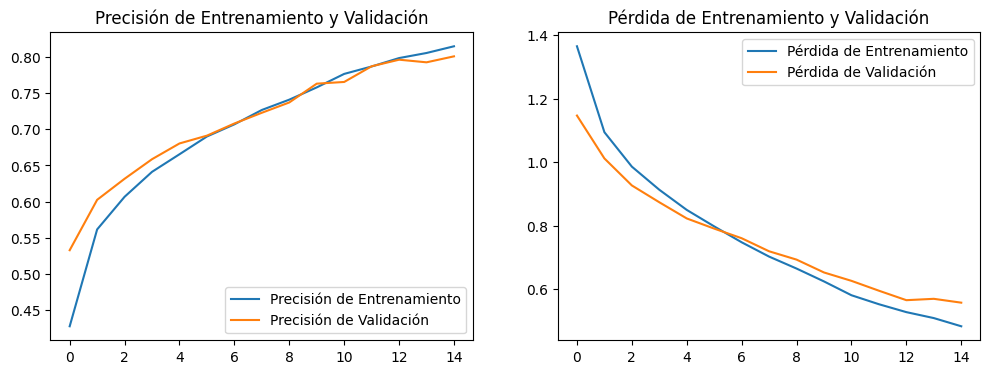

In [31]:
import matplotlib.pyplot as plt

# Obtener la historia de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()

In [32]:
# Evaluar el modelo usando el conjunto de validación
print("Iniciando evaluación final del modelo...")

loss, accuracy = model.evaluate(val_ds, verbose=1)

print(f"\n✅ Pérdida (Loss) en Validación: {loss:.4f}")
print(f"✅ Precisión (Accuracy) en Validación: {accuracy:.4f}")

Iniciando evaluación final del modelo...
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8050 - loss: 0.5488

✅ Pérdida (Loss) en Validación: 0.5577
✅ Precisión (Accuracy) en Validación: 0.8013


### cuarta configuración

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Definir los hiperparámetros de entrada
num_classes = len(class_names) # Número de categorías de emoción (ej. 5)
input_shape = (image_height, image_width, 3) # (48, 48, 3) si es RGB

# 2. Construir el modelo secuencial
model = Sequential([
    # Bloque 1: Convolución y Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    # Bloque 2: Más convolución para aprender características más complejas
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Bloque 3 (Opcional): Más profundidad
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Bloque 4 (Opcional): Más profundidad y Dropout para regularización
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25), # Ayuda a prevenir el sobreajuste

    # Capa de Aplanamiento (Flatten)
    Flatten(), # Convierte el tensor 3D a un vector 1D

    # Capas Densas (Fully Connected)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5), # Más Dropout antes de la salida

    # Capa de Salida
    # Usamos 'softmax' para problemas de clasificación multiclase.
    Dense(num_classes, activation='softmax')
])

# 3. Compilar el modelo
model.compile(
    optimizer='adam', # Optimizador muy común y eficiente
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 4. Mostrar el resumen del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,221 (848.52 KB)

 Trainable params: 217,221 (848.52 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Definir el número de épocas (ciclos completos sobre el dataset)
epochs = 15

print(f"\nIniciando entrenamiento por {epochs} épocas...")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Entrenamiento finalizado.")


Iniciando entrenamiento por 15 épocas...
Epoch 1/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.3412 - loss: 1.5148 - val_accuracy: 0.5195 - val_loss: 1.1405
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5290 - loss: 1.1379 - val_accuracy: 0.5930 - val_loss: 1.0222
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5920 - loss: 1.0120 - val_accuracy: 0.6251 - val_loss: 0.9325
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6325 - loss: 0.9236 - val_accuracy: 0.6470 - val_loss: 0.8854
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6686 - loss: 0.8491 - val_accuracy: 0.6726 - val_loss: 0.8344
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6909 - loss: 0.7915 - val_accuracy: 0.6792 - val_loss: 0.8230
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7158 - loss: 0.7403 - val_accuracy: 0.6875 - val_loss: 0.7917
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accura

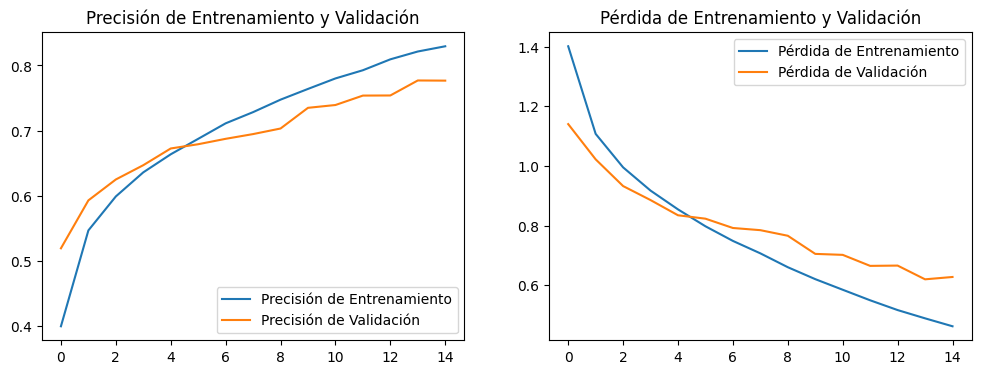

In [35]:
import matplotlib.pyplot as plt

# Obtener la historia de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()

### Configuración Final

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 1. Definir los hiperparámetros de entrada
num_classes = len(class_names) # Número de categorías de emoción (ej. 5)
input_shape = (image_height, image_width, 3) # (48, 48, 3) si es RGB

# 2. Construir el modelo secuencial
model = Sequential([
    # Bloque 1: Convolución y Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    # Bloque 2: Más convolución para aprender características más complejas
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Capa de Aplanamiento (Flatten)
    Flatten(), # Convierte el tensor 3D a un vector 1D

    # Capas Densas (Fully Connected)
    Dense(128, activation='relu'),
    #Dropout(0.5), # Más Dropout antes de la salida

    # Capa de Salida
    # Usamos 'softmax' para problemas de clasificación multiclase.
    Dense(num_classes, activation='softmax')
])

# 3. Compilar el modelo
model.compile(
    optimizer='adam', # Optimizador muy común y eficiente
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# 4. Mostrar el resumen del modelo
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,677,061 (6.40 MB)

 Trainable params: 1,677,061 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Definir el número de épocas (ciclos completos sobre el dataset)
epochs = 15

print(f"\nIniciando entrenamiento por {epochs} épocas...")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

print("Entrenamiento finalizado.")


Iniciando entrenamiento por 15 épocas...
Epoch 1/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.4058 - loss: 1.4192 - val_accuracy: 0.5165 - val_loss: 1.1917
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5653 - loss: 1.0819 - val_accuracy: 0.5908 - val_loss: 1.0257
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6395 - loss: 0.9256 - val_accuracy: 0.6308 - val_loss: 0.9418
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7107 - loss: 0.7680 - val_accuracy: 0.6653 - val_loss: 0.8665
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7736 - loss: 0.6138 - val_accuracy: 0.7225 - val_loss: 0.7646
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8430 - loss: 0.4506 - val_accuracy: 0.7633 - val_loss: 0.6832
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8984 - loss: 0.3105 - val_accuracy: 0.7957 - val_loss: 0.6481
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accu

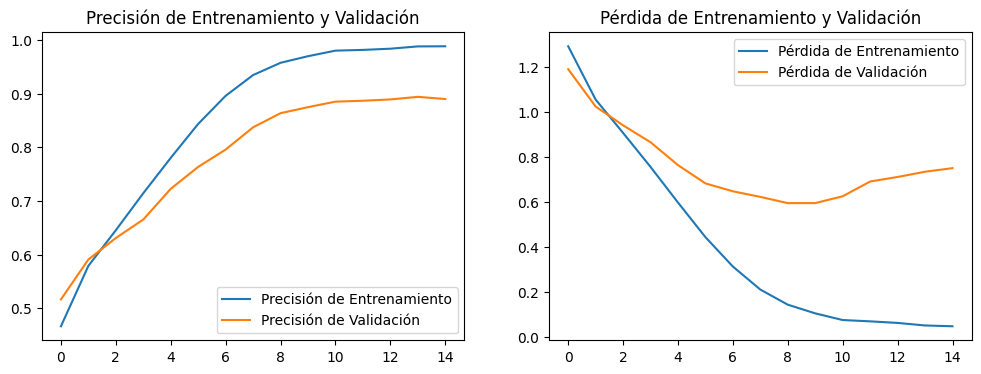

In [38]:
import matplotlib.pyplot as plt

# Obtener la historia de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')
plt.show()

## Evaluación

In [39]:
# Evaluar el modelo usando el conjunto de validación
print("Iniciando evaluación final del modelo...")

loss, accuracy = model.evaluate(val_ds, verbose=1)

print(f"\n✅ Pérdida (Loss) en Validación: {loss:.4f}")
print(f"✅ Precisión (Accuracy) en Validación: {accuracy:.4f}")

Iniciando evaluación final del modelo...
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.7417

✅ Pérdida (Loss) en Validación: 0.7512
✅ Precisión (Accuracy) en Validación: 0.8898


## Matiz de Confusión

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el dataset a numpy arrays para la evaluación
all_images = []
all_labels = []

# Iterar sobre el conjunto de validación
for images, labels in val_ds.unbatch().as_numpy_iterator():
    all_images.append(images)
    all_labels.append(labels)

# Concatenar todos los lotes
test_images = np.stack(all_images)
test_labels_true = np.array(all_labels)

print(f"Número total de muestras de prueba/validación: {len(test_labels_true)}")

Número total de muestras de prueba/validación: 11819


370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

       Angry       0.86      0.87      0.87      2058
        Fear       0.87      0.81      0.84      1981
       Happy       0.93      0.94      0.94      3648
         Sad       0.85      0.87      0.86      2503
     Suprise       0.92      0.92      0.92      1629

    accuracy                           0.89     11819
   macro avg       0.89      0.88      0.88     11819
weighted avg       0.89      0.89      0.89     11819



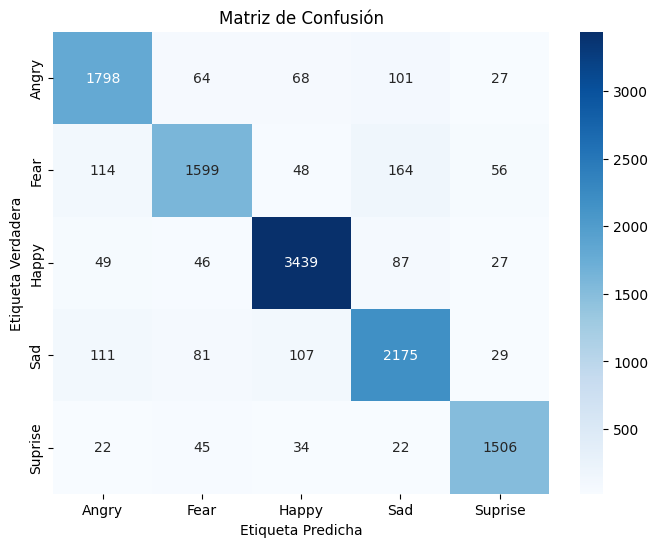

In [41]:
# 1. Generar predicciones (probabilidades)
predictions_prob = model.predict(test_images)

# 2. Convertir probabilidades a etiquetas (clases) predichas
# Elegimos el índice con la probabilidad más alta
test_labels_pred = np.argmax(predictions_prob, axis=1)

# 3. Mostrar el reporte de clasificación (precisión, recall, F1-score por clase)
print("\n--- Reporte de Clasificación ---")
print(classification_report(test_labels_true, test_labels_pred, target_names=class_names))

# 4. Generar y visualizar la Matriz de Confusión
cm = confusion_matrix(test_labels_true, test_labels_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

## Pruebas Extras

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

# --- Variables necesarias (Asegúrate de que coincidan con tu modelo) ---
image_height = 48
image_width = 48
target_shape = (image_height, image_width)
class_names = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise'] # Reemplaza con tus clases reales

# 1. Rutas de la carpeta comprimida y destino
zip_file_name = '/imagenes_cnn.zip' # ¡Asegúrate de cambiar esto!
extracted_folder_name = 'imagenes_cnn'

# 2. Descomprimir la carpeta (si es necesario)
print(f"Descomprimiendo {zip_file_name}...")
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_name)
print(f"Archivos extraídos en: {extracted_folder_name}")

Descomprimiendo /imagenes_cnn.zip...


FileNotFoundError: [Errno 2] No such file or directory: '/imagenes_cnn.zip'

In [ ]:



# --- 3. Función de Pre-procesamiento y Predicción ---
def predict_emotion_for_folder(model, folder_path, class_names, target_shape):

    # Obtener la lista de archivos JPG/JPEG
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]

    if not image_files:
        print(f"Error: No se encontraron archivos JPG/JPEG en {folder_path}")
        return

    plt.figure(figsize=(15, 10)) # Tamaño grande para visualizar 8 imágenes

    for i, file_name in enumerate(image_files):
        img_path = os.path.join(folder_path, file_name)

        # Cargar y redimensionar
        img = tf.keras.utils.load_img(img_path, target_size=target_shape)

        # Convertir a array y expandir la dimensión de lote
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)

        # Normalizar: 0-255 -> 0.0-1.0
        img_array = img_array / 255.0

        # Ejecutar la predicción
        predictions = model.predict(img_array, verbose=0)

        # Obtener el resultado
        predicted_class_index = np.argmax(predictions[0])
        predicted_emotion = class_names[predicted_class_index]
        confidence = predictions[0][predicted_class_index]

        # 4. Visualización
        ax = plt.subplot(2, 4, i + 1) # Asume 2 filas y 4 columnas
        plt.imshow(img)
        plt.title(f"{file_name}\n{predicted_emotion} ({confidence*100:.1f}%)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- 4. Ejecutar la Función ---
if 'model' in locals():
    predict_emotion_for_folder(model, '/content/imagenes_cnn/imagenes_cnn', class_names, target_shape)
else:
    print("Error: El modelo 'model' no está definido. Asegúrate de haber ejecutado las celdas de entrenamiento.")